In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi
import squarify # pip install squarify (algorithm for treemap)

In [4]:
eventos = pd.read_csv('/home/facundo/Escritorio/datos2019local/data/events.csv', low_memory=False)

In [3]:
eventos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494423 entries, 0 to 2494422
Data columns (total 22 columns):
date                  object
event_id              int64
ref_type              int64
ref_hash              int64
application_id        int64
attributed            bool
device_countrycode    int64
device_os_version     float64
device_brand          float64
device_model          float64
device_city           float64
session_user_agent    float64
trans_id              object
user_agent            float64
event_uuid            object
carrier               float64
kind                  float64
device_os             float64
wifi                  object
connection_type       object
ip_address            int64
device_language       float64
dtypes: bool(1), float64(10), int64(6), object(5)
memory usage: 402.0+ MB


In [4]:
eventos.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.248157e+17,9.977660e+17,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.248157e+17,8.561153e+18,7.531669e+18,NaN,Cable/DSL,6324037615828123965,4.077062e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,NaN,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.248157e+17,8.731902e+17,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18


In [7]:
eventos['event_id'].value_counts().head(10)

22     618228
31     417070
161    217846
1      157812
138    100039
162     84898
329     56490
156     53332
33      48581
171     43942
Name: event_id, dtype: int64

In [8]:
# Top de las 10 aplicaciones que más datos le proveen a Jampp
eventos['application_id'].value_counts().head(10)

66     325696
64     259084
145    252431
63     181555
103    137513
57     134498
121    123711
212    108489
113     82962
39      76448
Name: application_id, dtype: int64

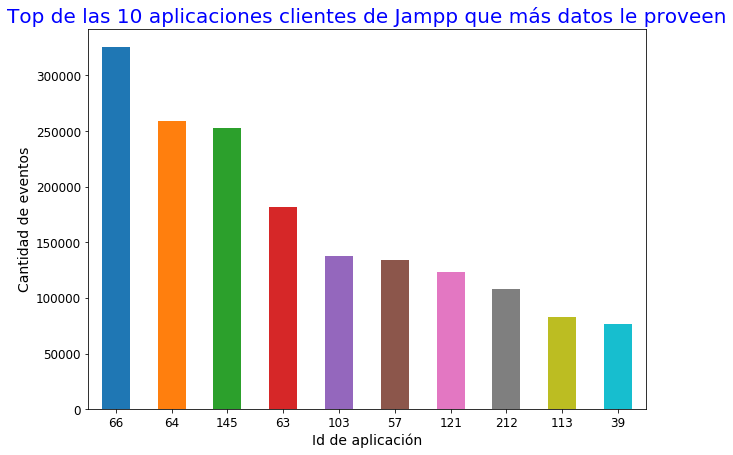

In [144]:
plot = eventos['application_id'].value_counts().head(10).plot(kind='bar',figsize=(10,7),fontsize=12)
plot.set_xlabel('Id de aplicación',fontsize=14)
plot.set_ylabel('Cantidad de eventos',fontsize=14)
plot.set_title('Top de las 10 aplicaciones clientes de Jampp que más datos le proveen', fontsize=20,color = 'blue')
plot.set_xticklabels(['66', '64', '145', '63', '103', '57', '121', '212', '113', '39'], rotation=0)
plt.show()

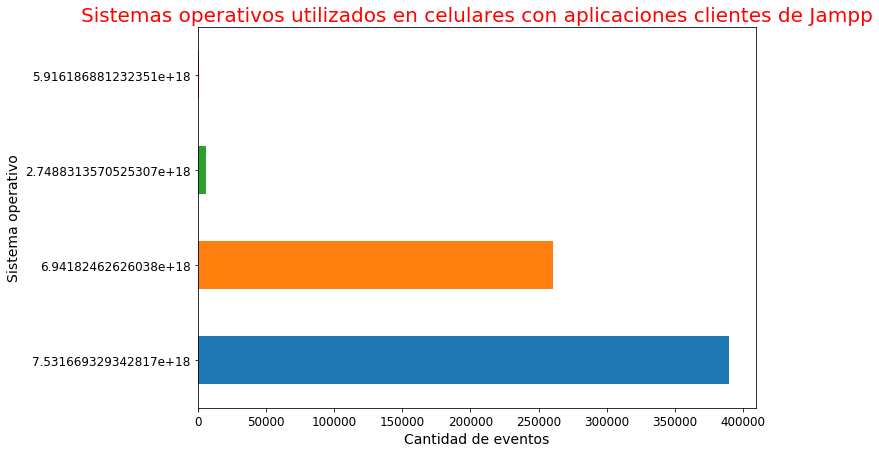

In [94]:
plot = eventos['device_os'].value_counts().plot(kind='barh',figsize=(10,7),fontsize=12)
plot.set_xlabel('Cantidad de eventos',fontsize=14)
plot.set_ylabel('Sistema operativo',fontsize=14)
plot.set_title('Sistemas operativos utilizados en celulares con aplicaciones clientes de Jampp', fontsize=20,color = 'red')
plt.show()

Se puede observar claramente que hay dos sistemas operativos que lideran los eventos. Suponemos que son Android y iOS.

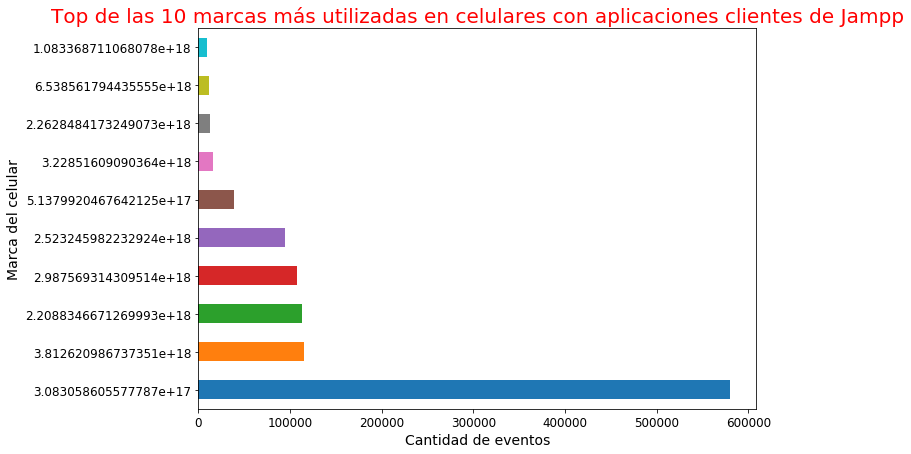

In [95]:
plot = eventos['device_brand'].value_counts().head(10).plot(kind='barh',figsize=(10,7),fontsize=12)
plot.set_xlabel('Cantidad de eventos',fontsize=14)
plot.set_ylabel('Marca del celular',fontsize=14)
plot.set_title('Top de las 10 marcas más utilizadas en celulares con aplicaciones clientes de Jampp', fontsize=20,color = 'red')
plt.show()

Se puede observar que hay una marca que supera a las demás en un gran porcentaje. Suponemos que es Samsung ya que líder mundial en venta de celulares.

In [79]:
eventos['device_model'].value_counts().head(10)

2.331947e+18    210697
7.787531e+18     74780
9.149036e+18     66279
2.066431e+17     60168
4.445252e+18     56241
1.754528e+18     53850
8.163783e+18     48814
7.116343e+18     44598
2.928262e+18     41494
5.990117e+18     40935
Name: device_model, dtype: int64

In [4]:
actividad = eventos.loc[:,['date', 'event_id']]
actividad['date'] = pd.to_datetime(actividad['date'])
actividad["dia"] = actividad.loc[:,"date"].dt.date
actividad["hora"] = pd.to_datetime(actividad.loc[:,"date"].dt.strftime('%Y-%m-%d %H'))
actividad.head(10)

,date,event_id,dia,hora
0,2019-03-05 00:09:36.966,0,2019-03-05,2019-03-05 00:00:00
1,2019-03-05 00:09:38.920,1,2019-03-05,2019-03-05 00:00:00
2,2019-03-05 00:09:26.195,0,2019-03-05,2019-03-05 00:00:00
3,2019-03-05 00:09:31.107,2,2019-03-05,2019-03-05 00:00:00
4,2019-03-09 21:00:36.585,3,2019-03-09,2019-03-09 21:00:00
5,2019-03-09 20:29:45.449,4,2019-03-09,2019-03-09 20:00:00
6,2019-03-09 20:29:40.602,5,2019-03-09,2019-03-09 20:00:00
7,2019-03-09 20:45:12.067,0,2019-03-09,2019-03-09 20:00:00
8,2019-03-09 20:40:07.977,0,2019-03-09,2019-03-09 20:00:00
9,2019-03-09 20:27:09.984,1,2019-03-09,2019-03-09 20:00:00


In [41]:
# Se puede observar que sólo hay datos de eventos realizados entre el 05-03-2019 y el 13-03-2019, es decir 9 días.
actividad["dia"].value_counts()

2019-03-13    316267
2019-03-12    296665
2019-03-10    293091
2019-03-09    286221
2019-03-08    285535
2019-03-11    268884
2019-03-07    253706
2019-03-06    253505
2019-03-05    240549
Name: dia, dtype: int64

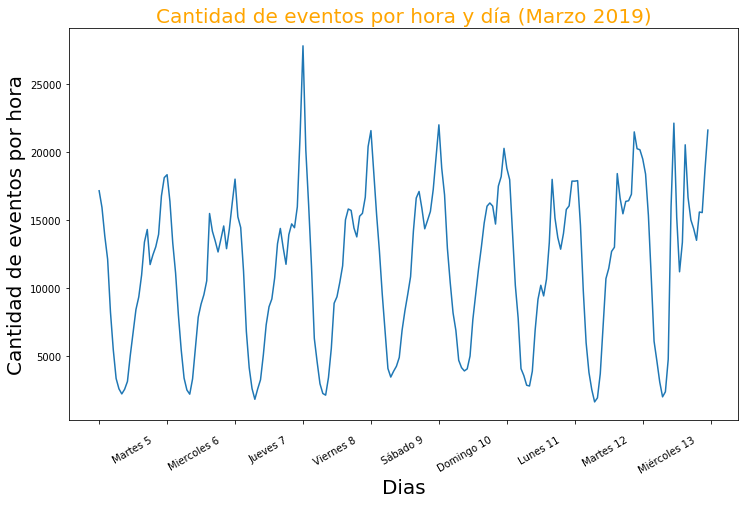

In [51]:
plot = actividad['hora'].value_counts().plot(kind='line',figsize=(12,8))
plot.set_title('Cantidad de eventos por hora y día (Marzo 2019)', fontsize=20,color = 'orange')
plot.set_xlabel('Dias',fontsize=20)
plot.set_ylabel('Cantidad de eventos por hora',fontsize=20)
espacio = ''
plot.set_xticklabels(['', 'Martes 5     ', 'Miercoles 6     ', 'Jueves 7     ', 'Viernes 8     ', 'Sábado 9     ', 'Domingo 10     ', 'Lunes 11     ', 'Martes 12     ', 'Miércoles 13     '])
plt.show()

El 8 de marzo se celebró el Black Friday

In [ ]:
sns.heatmap(actividad, annot=True)

In [25]:
actividad2 = eventos.loc[:,['date']]
actividad2['date'] = pd.to_datetime(actividad2['date'])
actividad2['dia'] = actividad2['date'].dt.day
actividad2['hora'] = actividad2['date'].dt.hour

,date,dia,hora
0,2019-03-05 00:09:36.966,5,0
1,2019-03-05 00:09:38.920,5,0
2,2019-03-05 00:09:26.195,5,0
3,2019-03-05 00:09:31.107,5,0
4,2019-03-09 21:00:36.585,9,21
5,2019-03-09 20:29:45.449,9,20
6,2019-03-09 20:29:40.602,9,20
7,2019-03-09 20:45:12.067,9,20
8,2019-03-09 20:40:07.977,9,20
9,2019-03-09 20:27:09.984,9,20


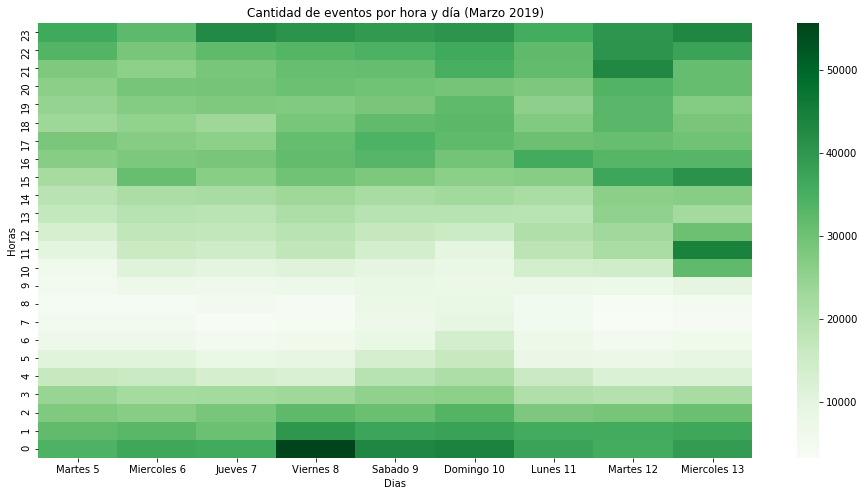

In [52]:
actividad3 = actividad2.loc[:,['dia', 'hora']].groupby(['dia', 'hora']).agg(np.size).reset_index()
pivoted = pd.pivot_table(actividad3, values=0, columns='dia', index='hora')
fig, ax = plt.subplots(figsize=(16,8))
g = sns.heatmap(pivoted,cmap='Greens');
g.set_title("Cantidad de eventos por hora y día (Marzo 2019)")
g.set_xlabel('Dias')
g.set_ylabel('Horas')
g.set_xticklabels(['Martes 5', 'Miercoles 6','Jueves 7','Viernes 8','Sabado 9','Domingo 10', 'Lunes 11', 'Martes 12', 'Miercoles 13'])
g.invert_yaxis()

Se puede observar que, como es de esperar, la cantidad de eventos es casi nula en la franja horaria de las 4 a las 9 de la mañana, ya que es el momento donde la mayoría de la gente duerme o recién comienza a despertarse.
También se puede notar que el día viernes 8 a las 00:00 horas se da el mayor número de eventos. Esto puede deberse a que ese día se celebró el Black Friday.

In [68]:
atribuidos = eventos[['event_id','attributed']]
atribuidos[atribuidos['attributed']==True]

,event_id,attributed
11150,80,True
11151,1,True
11152,81,True
31408,133,True
31482,133,True
31483,133,True
31566,133,True
31628,133,True
31629,133,True
31701,133,True


In [22]:
eventos['connection_type'].value_counts()

Cable/DSL    331948
Cellular     280511
Corporate         4
Name: connection_type, dtype: int64

In [6]:
eventos['wifi'].value_counts()

True     930902
False    447970
Name: wifi, dtype: int64

In [29]:
# Se crea un vector con la cantidad de eventos con conexión de Cable/DSL, Cellular, Wifi (True) respectivamente
conexiones = [331948, 280511, 930902]
conexiones

[331948, 280511, 930902]

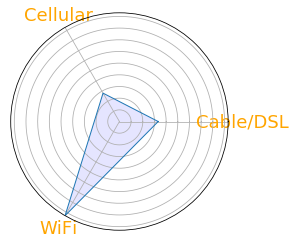

In [64]:
categorias = list(['Cable/DSL', 'Cellular', 'WiFi'])
cantidades = list(conexiones)
cantidades += cantidades[:1]
cantidades
N = len(categorias)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
angles

ax = plt.subplot(111, polar=True)
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categorias, color='orange', size=18,horizontalalignment="center")
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000], [], color="grey", size=8)
plt.ylim(0,930902)
# Plot data
ax.plot(angles, cantidades, linewidth=1, linestyle='solid')
# Fill area
ax.fill(angles, cantidades, 'b', alpha=0.1)

Para este análisis se consideró interesante presentar un gráfico de radar. En este tipo de esquemas se define según escala un valor a cada radio del radar y se divide la circunferencia en tantas partes como variables se quieran mostrar. Luego se le asigna el valor que alcanza cada variable y se genera el gráfico, en el cual se podrá ver a simple cuáles son las conexiones más frecuentes y su relación proporcional entre ellas.
Se puede observar, como era de esperar, que en la mayoría de las aplicaciones clientes de Jampp se navega con una conexión de WiFi. En segundo lugar, no muy distante del tercero, se ubica la conexión mediante Cable/DSL, lo que se puede suponer es que, es muy probable que éstos sean juegos ya que en ellos se necesita una conexión más directa para que rinda al máximo. También se podría suponer que son computadoras que no tienen tecnología WiFi, pero esto es muy poco frecuente a esta altura de la tecnología. En tercer lugar quedó la conexión mediante red Cellular, que debe ser 3G, 4G, etc. Lo cual es lógico ya que generalmente se trata de ahorrar los datos para navegar que uno tiene en el celular debido a que son costosos.

In [73]:
conexiones = eventos.loc[:,['connection_type', 'wifi']]
conexiones.groupby('connection_type').count()

,wifi
connection_type,
Cable/DSL,0
Cellular,0
Corporate,0


In [76]:
conexiones.groupby('wifi').count()

,connection_type
wifi,
False,0
True,0


In [81]:
operadores = eventos.loc[:,['carrier', 'connection_type']]
operadores.groupby(['carrier', 'connection_type']).agg(np.size)

carrier       connection_type
2.248157e+17  Cable/DSL          651212
              Cellular           222754
1.179587e+18  Cable/DSL            4648
              Cellular           157268
1.757690e+18  Cable/DSL             928
2.959658e+18  Cable/DSL               4
3.570805e+18  Cable/DSL            6914
3.751135e+18  Cable/DSL              32
4.890489e+18  Cable/DSL             158
              Cellular             4896
6.790110e+18  Corporate               8
6.948828e+18  Cellular            59148
7.855224e+18  Cellular           116956
dtype: int64

Se puede observar que hay cuatro compañías que se diferencian con las restantes en cuanto a usuarios, por lo que se graficarán sólo éstas.

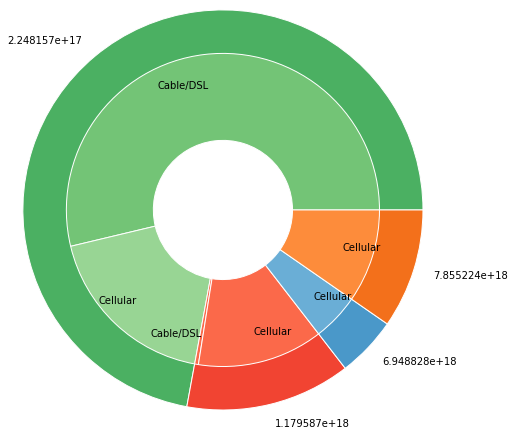

In [107]:
# Make data: I have 3 groups and 7 subgroups
group_names=['2.248157e+17', '1.179587e+18', '6.948828e+18', '7.855224e+18']
group_size=[651212+222754,4648+157268,59148, 116956]

subgroup_names=['Cable/DSL', 'Cellular', 'Cable/DSL', 'Cellular', 'Cellular', 'Cellular']
subgroup_size=[651212,222754,4648,157268,59148,116956]
 
# Create colors
a, b, c, d  = [plt.cm.Greens ,plt.cm.Reds, plt.cm.Blues, plt.cm.Oranges]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6), d(0.6)])
plt.setp( mypie, width=1.2, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.8, labels=subgroup_names, labeldistance=0.80, colors=[a(0.5), a(0.4), b(0.5), b(0.5), c(0.5), d(0.5)])
plt.setp( mypie2, width=1, edgecolor='white')
plt.margins(0,0)

plt.title('Cantidad de veces puesto en lead por modelo de telefono', fontsize=20)

# show it
plt.show()

De las cuatro compañias analizadas, se puede observar que hay una que contiene a la gran mayoría de los usuarios, a los cuales les provee tanto el servicio de telefonía móvil así como el de internet. La segunda empresa con más usuarios también brinda los dos servicios, pero mayormente el de celular. Las dos restantes sólo tienen servicio para dispositivos móviles.

In [108]:
eventos['device_countrycode'].value_counts()

6333597102633388268    2494423
Name: device_countrycode, dtype: int64

In [4]:
lenguajes = eventos['device_language'].value_counts().reset_index()
lenguajes = lenguajes.rename(columns = {'index': 'lenguaje', 'device_language': 'cantidad'})
lenguajes.head(15)

,lenguaje,cantidad
0,6.977049e+18,745898
1,3.301378e+18,589865
2,9.028383e+18,388832
3,6.804428e+18,340624
4,4.621024e+18,150143
5,4.077062e+17,53277
6,2.822843e+17,28294
7,4.060930e+18,25943
8,3.095856e+18,25635
9,6.111820e+18,18314


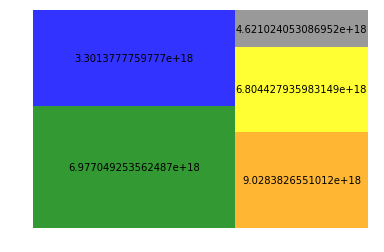

In [6]:
squarify.plot(sizes=lenguajes['cantidad'].head(5), label=lenguajes['lenguaje'].head(5), color=['green', 'blue', 'orange','yellow', 'grey'], alpha=.8 )
plt.axis('off')
plt.show()

En el gráfico se muestran los cinco lenguajes más usados en los dispositivos. El que está representado por el cuadrado con más área (el verde) se podría afirmar que es el "español", seguido del "inglés" representado por el cuadrado de color azul, si seguimos la lógica de los idiomas más hablados en Occidente. Vale aclarar que todos los eventos fueron originados en un solo país. Lo curioso es que los lenguajes que se utilizan en los dispositivos son muchos, es por ello que en un primer momento se había pensado que el país de los datos era Estados Unidos, ya que allí hay mucho turismo y también mucha gente viviendo que habla diferentes idiomas, pero se supo que el país era Uruguay. Resulta muy raro entonces, que en un país tan pequeño haya celulares con tantos idiomas distintos. 

In [15]:
eventos['device_city'].value_counts().head(5)

3.800080e+18    561876
2.551781e+18     11193
3.258215e+18      4442
8.223209e+18      4393
8.578627e+17      2497
Name: device_city, dtype: int64

Se puede analizar que hay una ciudad en la que se originan casi todos los eventos. Es muy probable que esta sea la capital del país de los datos. Sabiendo que dicho país es Uruguay, se podría decir que la ciudad es Montevideo y sería muy lógico ya que la población charrúa se concentra principalmente allí.

In [7]:
ciudades = eventos.loc[:, ['event_id', 'device_city']]
ciudades.groupby('event_id').count()

,device_city
event_id,
0,42
1,151102
2,42
3,2
4,6
5,7
6,12
7,7
8,7


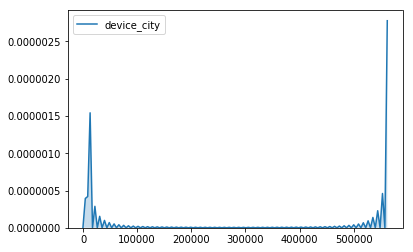

In [20]:
p1=sns.kdeplot(eventos['device_city'].value_counts(), shade=True)